In [1]:
# Dependencies
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import data frame for combusion engine cars
ice_df=pd.read_csv("Resources/Edmunds.csv")
ice_df.head()

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1544,1598,1654,1712,1772,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
1,Maintenance,86,440,386,2465,2049,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
2,Repairs,0,0,0,462,707,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
3,Taxes_Fees,3347,239,214,194,194,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
4,Financing,4197,3421,2566,1628,597,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096


In [3]:
#add up yearly cost based on model and engine type
ice_yearly_cost_df=ice_df.groupby(["model","engine",'cost']).sum()
#fix summing of model year
ice_yearly_cost_df["model year"]=round(ice_yearly_cost_df["model year"]/7,0).astype(int)
ice_yearly_cost_df.head()

info  \
model                                              engine              cost                                                       
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096  InsuranceMaintenanceRepairsTaxes_FeesFinancing...   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996  InsuranceMaintenanceRepairsTaxes_FeesFinancing...   
                                                   1.5L 4cyl Turbo CVT 37996  InsuranceMaintenanceRepairsTaxes_FeesFinancing...   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517  InsuranceMaintenanceRepairsTaxes_FeesFinancing...   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473  InsuranceMaintenanceRepairsTaxes_FeesFinancing...   

                                                                              year 1  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   25212   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996   16606   
                                                   1.5L 4cyl Turbo CVT 37996   16469   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517   15978   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473   15270   

                                                                              year 2  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   12465   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8915   
                                                   1.5L 4cyl Turbo CVT 37996    8774   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8369   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8113   

                                                                              year 3  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   10953   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8028   
                                                   1.5L 4cyl Turbo CVT 37996    7883   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    7548   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    7348   

                                                                              year 4  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   13068   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8640   
                                                   1.5L 4cyl Turbo CVT 37996    8583   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8275   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8099   

                                                                              year 5  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   11562   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8712   
                                                   1.5L 4cyl Turbo CVT 37996    8558   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8314   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8082   

                                                                              model year  
model                        

In [4]:
ice_yearly_cost_df.sort_values("year 1",ascending=False)

,,,info,year 1,year 2,year 3,year 4,year 5,model year
model,engine,cost,,,,,,,
Audi R8 GT 2dr Coupe,5.2L 10cyl 7AM,72287,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,139035,39599,32779,31441,28550,2023
Audi R8 Convertible performance Spyder 2dr Convertible AWD,5.2L 10cyl 7AM,264177,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,136097,39115,32531,33553,28715,2023
Audi R8 Convertible performance Spyder 2dr Convertible AWD,5.2L 10cyl 7AM,264177,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,136097,39115,32531,33553,28715,2023
Audi R8 performance 2dr Coupe AWD,5.2L 10cyl 7AM,30823,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,119731,34903,29174,30623,26622,2023
Audi R8 performance 2dr Coupe,5.2L 10cyl 7AM,97003,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,102361,30363,25483,27212,24126,2023
...,...,...,...,...,...,...,...,...,...
Chevrolet Malibu LS 4dr Sedan,1.5L 4cyl Turbo CVT,25998,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,12838,6975,6556,7163,7457,2023
Chevrolet Equinox LS 4dr SUV,1.5L 4cyl Turbo 6A,27471,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,12638,7351,7028,8415,8058,2023
Chevrolet Malibu RS 4dr Sedan,1.5L 4cyl Turbo CVT,26843,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,11633,7244,6802,7427,7909,2023


<Axes: >

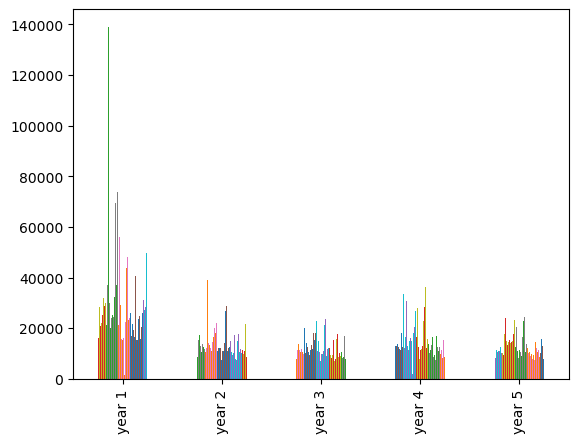

In [5]:
#fig,ax =plt.subplots()
#ax.bar(ice_yearly_cost_df[])
ice_transposed= ice_yearly_cost_df[['year 1', 'year 2', 'year 3', 'year 4', 'year 5']].T
ice_transposed.plot(kind='bar',legend=False,align="center")#, figsize=(6,8))

In [16]:
ice_yearly_cost_df['five_year_cost']=0
for i in range(5):
    text='year '+str(i+1)
    ice_yearly_cost_df['five_year_cost']=ice_yearly_cost_df['five_year_cost']+ice_yearly_cost_df[text]
    

In [9]:
ice_yearly_cost_df.head()

info  \
model                                              engine              cost                                                       
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096  InsuranceMaintenanceRepairsTaxes_FeesFinancing...   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996  InsuranceMaintenanceRepairsTaxes_FeesFinancing...   
                                                   1.5L 4cyl Turbo CVT 37996  InsuranceMaintenanceRepairsTaxes_FeesFinancing...   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517  InsuranceMaintenanceRepairsTaxes_FeesFinancing...   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473  InsuranceMaintenanceRepairsTaxes_FeesFinancing...   

                                                                              year 1  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   25212   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996   16606   
                                                   1.5L 4cyl Turbo CVT 37996   16469   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517   15978   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473   15270   

                                                                              year 2  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   12465   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8915   
                                                   1.5L 4cyl Turbo CVT 37996    8774   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8369   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8113   

                                                                              year 3  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   10953   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8028   
                                                   1.5L 4cyl Turbo CVT 37996    7883   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    7548   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    7348   

                                                                              year 4  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   13068   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8640   
                                                   1.5L 4cyl Turbo CVT 37996    8583   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8275   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8099   

                                                                              year 5  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   11562   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8712   
                                                   1.5L 4cyl Turbo CVT 37996    8558   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8314   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8082   

                                                                              model year  \
model                       

Text(0, 0.5, 'Fraction of 5 year cost')

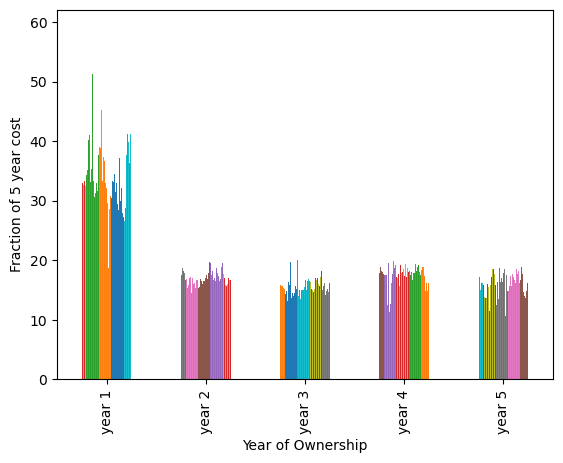

In [35]:
ice_yearly_fraction=pd.DataFrame(columns=['a'])
for i in range(5):
    text='year '+str(i+1)
    ice_yearly_fraction[text]=ice_yearly_cost_df[text]/ice_yearly_cost_df['five_year_cost']*100
    #print(ice_yearly_cost_df[text]/ice_yearly_cost_df['five_year_cost']*100)
del ice_yearly_fraction['a']
ice_yearly_fraction
ice_ratio_plot=ice_yearly_fraction.T.plot(kind='bar',legend=False,align="center")
ice_ratio_plot.set_xlabel("Year of Ownership")
ice_ratio_plot.set_ylabel("Fraction of 5 year cost")